In [5]:
import matplotlib.pyplot as plt
from multiomicscellsim import Simulator
from multiomicscellsim.config import SimulatorConfig, MicroscopySpaceConfig, TissueConfig

from multiomicscellsim.cpm.cpmentities import CPMCellType, CPMGrid
from multiomicscellsim.cpm.constraints import VolumeConstraint, AdhesionConstraint, PerimeterConstraint


import math

# Helper dunctions to determine 
bka = 15.0 # background adhesion
sla = 0.0 # self adhesion
ciruclar_perimeter = lambda area: int(round(2 * math.sqrt(math.pi * area)))


config = SimulatorConfig(
    microscopy_space_config=MicroscopySpaceConfig(
        cpm_grid_size=128
    ),
    # CPM related parameters (how cell grow and interact)
    tissue_config=TissueConfig(
        cell_number_mean=50,
        # Each cell type has a unique id, and a set of parameters that define the properties of a "kind" of cell
        cpm_cell_types=[
            CPMCellType(id=0, adhesion_energy=[0,   bka, bka], name="background"),
            CPMCellType(id=1, adhesion_energy=[bka, sla, 10.0], preferred_volume=100, preferred_perimeter=ciruclar_perimeter(100)),
            CPMCellType(id=2, adhesion_energy=[bka, 10.0, sla], preferred_volume=100, preferred_perimeter=ciruclar_perimeter(100)),
            ],
        # Constraints are rules that define how cells grow and interact
        cpm_constraints=[
            AdhesionConstraint(),
            VolumeConstraint(lambda_volume=10.0),
            PerimeterConstraint(lambda_perimeter=0.1),
        ],
        # Temprature controls the randomness of the simulation
        cpm_temperature=0.1,
        cpm_iterations=150
    )
)

sim = Simulator(config=config)
tissue = sim.tissue_generator.sample()


# TODO:
# - Add a stop condition based on % of grid occupied or delta between iterations
# - Find a principled way to plot everything
# - Postprocess CPM and bring it into microscopy space
# - collect everything you can about the cells


ERROR:multiomicscellsim.tissue_generator:Could not spawn cell at (119, 18), probably the position is already occupied.
ERROR:multiomicscellsim.tissue_generator:Could not spawn cell at (80, 53), probably the position is already occupied.
ERROR:multiomicscellsim.tissue_generator:Could not spawn cell at (63, 28), probably the position is already occupied.
ERROR:multiomicscellsim.tissue_generator:Could not spawn cell at (112, 48), probably the position is already occupied.
ERROR:multiomicscellsim.tissue_generator:Could not spawn cell at (58, 16), probably the position is already occupied.
ERROR:multiomicscellsim.tissue_generator:Could not spawn cell at (108, 31), probably the position is already occupied.
ERROR:multiomicscellsim.tissue_generator:Could not spawn cell at (72, 56), probably the position is already occupied.
ERROR:multiomicscellsim.tissue_generator:Could not spawn cell at (27, 31), probably the position is already occupied.
ERROR:multiomicscellsim.tissue_generator:Could not sp

buffer=106.0 min_radius=256.0 max_radius=307.2 3 * self.tissue_config.guidelines_std=150 
-106.0 1130.0
[(341.4783498707224, 978.0320557397501), (254.9407234598889, 562.901854057988), (293.5186292692854, 464.29623003199504), (153.3870737549794, 1036.1607596870665), (324.63011702357716, 811.479603966635), (97.27692316671708, 444.93736407628757), (134.7809715297583, 951.7357817240872), (364.1648370181283, 752.7515430910332), (465.2949688688758, 902.5763193920891), (441.75464305989635, 585.648464804019), (340.0245690262592, 705.5908921780034), (360.1467944126896, 1039.7891100782203), (235.61894570371015, 517.2960319217906), (395.5994857433028, 925.8252806390146), (390.89359781514634, 539.77437938601), (564.4601514292531, 864.0829278014126), (391.1315144302893, 647.7408666168253), (508.91899439656044, 615.2303517202937), (429.97241342837793, 652.5332519748815), (455.0792091124141, 730.7681528960196), (58.7083037011991, 855.6825394428283), (481.52823707190805, 602.7669963291881), (148.65657

  0%|          | 0/149 [00:00<?, ?it/s]/Users/edoardo.giacomello/Projects/Voronoi/multiomicscellsim/cpm/simulation.py:65: RuntimeWarning: overflow encountered in exp
  boltzman_prob = np.exp(-total_delta_energy/self.grid.temperature)
100%|██████████| 149/149 [05:50<00:00,  2.35s/it]


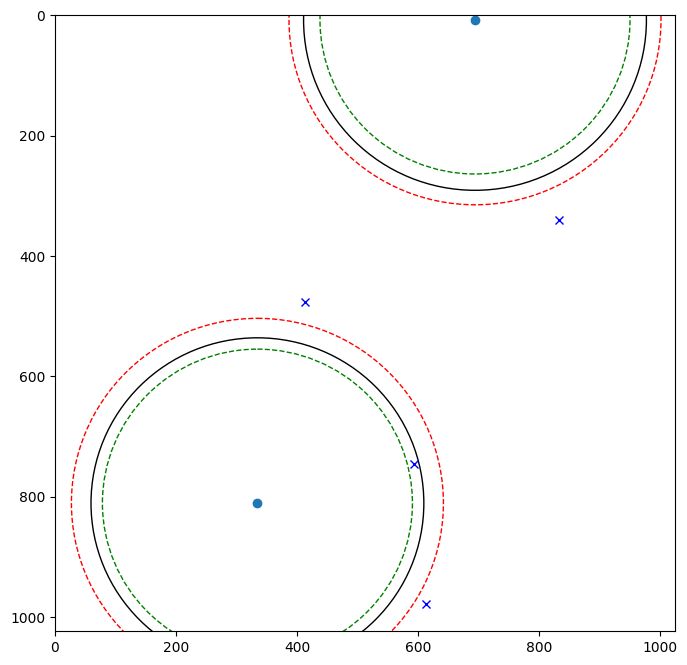

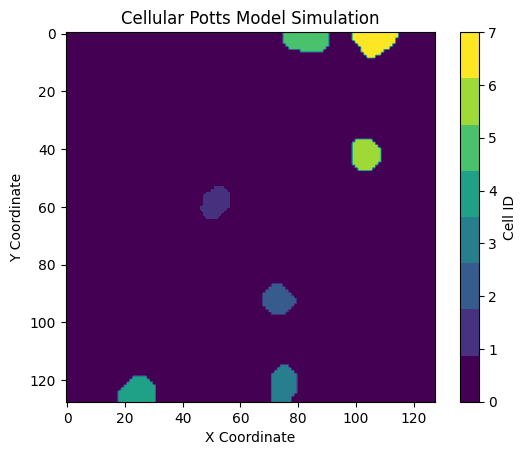

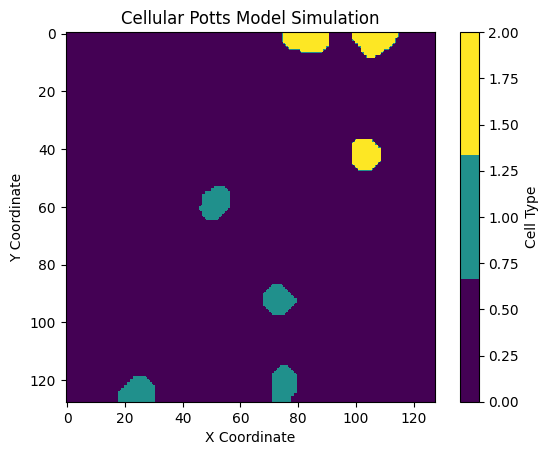

In [3]:
sim.plot_debug(tissue)